# Vehicle Loan Prediction Machine Learning Model

# Chapter 6 Model Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [6]:
loan_df = pd.read_csv('../data/vehicle_loans_feat.csv', index_col='UNIQUEID')

In [7]:
category_cols = ['MANUFACTURER_ID', 'STATE_ID', 'DISBURSAL_MONTH', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE_DESCRIPTION', 'EMPLOYMENT_TYPE']
loan_df[category_cols] = loan_df[category_cols].astype('category')

In [8]:
small_cols = ['STATE_ID', 'LTV', 'DISBURSED_CAT', 'PERFORM_CNS_SCORE', 'DISBURSAL_MONTH', 'LOAN_DEFAULT']
loan_df_sml = loan_df[small_cols]

loan_data_dumm = pd.get_dummies(loan_df_sml, prefix_sep='_', drop_first=True)

x = loan_data_dumm.drop(['LOAN_DEFAULT'], axis=1)
y = loan_data_dumm['LOAN_DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [9]:
logistic_model.score(x_test, y_test)

0.7822907507881023

## Evaluation Metrics

### Confusion Matrix

In [10]:
preds = logistic_model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
conf_mat = confusion_matrix(y_test, preds)
conf_mat

array([[36476,     1],
       [10151,     3]])

[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) returns a 2d array of TN, FP, FN and TP

2d array is an array with an array, we can access the elements using indexes much like a regular array

In our case, we can think of the confusion_matrix as a table with rows and columns

we access an element\[row_idx\]\[col_idx\]

Let's extract tn and fp from the confusion matrix

In [12]:
tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]

Great! Now let's print the outputs

In [13]:
print("True Negatives (Correct Non-Defaults): ", tn)
print("False Positives (Incorrect Defaults): ", fp)
print("False Negatives (Incorrect Non-Defaults): ", fn)
print("True Positives (Correct Defaults)", tp)

True Negatives (Correct Non-Defaults):  36476
False Positives (Incorrect Defaults):  1
False Negatives (Incorrect Non-Defaults):  10151
True Positives (Correct Defaults) 3


Ok, now the 78% accuracy makes a bit more sense, our model is pretty much predicting all loans as non-defaults

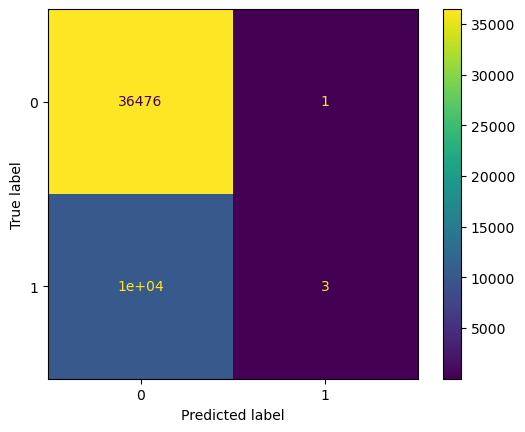

In [43]:
# First, calculate the confusion matrix
confusion = confusion_matrix(y_test, logistic_model.predict(x_test))

# Then, create the ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion)

# Finally, display the confusion matrix
cm_display.plot()
plt.show()

### Precision  = TP/TP + FP

In [21]:
precision = precision_score(y_test, preds)
precision

0.75

Ok, out of the positive predictions, 75% were actually positive. Although, we can see from the confusion matrix that the model  only predicted a small number of instances as positive.

### Recall = TP/TP + FN

In [22]:
recall = recall_score(y_test, preds)
recall

0.00029545006893834944

Recall of ~0.0003, we hardly identified any of the loan defaults, this model is not reliable

### F1 Score = 2((precision * recall)/(precision + recall))

In [24]:
f1 = f1_score(y_test, preds)
f1

0.0005906674542232723

f1 score of ~0.0006 should prove beyond doubt that our model is not reliable despite the 78% accuracy

## Roc Curve



In [25]:
probs = logistic_model.predict_proba(x_test)
probs

array([[0.71535152, 0.28464848],
       [0.82074095, 0.17925905],
       [0.79445544, 0.20554456],
       ...,
       [0.77465234, 0.22534766],
       [0.90236941, 0.09763059],
       [0.74223881, 0.25776119]])

The output of [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) is a multi-dimensional array

In [26]:
probs.shape

(46631, 2)

Great! We have 46631 rows and 2 columns
- Cells in the first column give the predicted probability that a data point belongs to class 0
- Cells in the second column give the predicted probability that a data point belongs to class 1

Let's look at the values in these columns

In [27]:
print(probs[:, 0])
print(probs[:, 1])

[0.71535152 0.82074095 0.79445544 ... 0.77465234 0.90236941 0.74223881]
[0.28464848 0.17925905 0.20554456 ... 0.22534766 0.09763059 0.25776119]


We can also create a dataframe and get the summary statistics for our predicted probabilities

In [28]:
probs_df = pd.DataFrame()
probs_df['prob_0'] = probs[:, 0]
probs_df['prob_1'] = probs[:, 1]

probs_df.describe()

,prob_0,prob_1
count,46631.000000,46631.000000
mean,0.783700,0.216300
std,0.067731,0.067731
min,0.480128,0.035128
25%,0.740033,0.169157
50%,0.787262,0.212738
75%,0.830843,0.259967
max,0.964872,0.519872


### Plotting the ROC Curve


In [29]:
fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)

The [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) function returns 3 values

- threshold
- fpr (False Positive Rate)
- tpr (True Positive Rate)

Let's take a look at them

In [30]:
print("FPR: ", fpr)
print("TPR: ", tpr)
print("Threshold: ", threshold)

FPR:  [0.00000000e+00 2.74145352e-05 2.74145352e-05 ... 9.99725855e-01
 9.99725855e-01 1.00000000e+00]
TPR:  [0.00000000e+00 9.84833563e-05 2.95450069e-04 ... 9.99901517e-01
 1.00000000e+00 1.00000000e+00]
Threshold:  [1.51987151 0.51987151 0.50720064 ... 0.04979881 0.04973035 0.03512831]


Ok each of these variables is an array of floating-point values, let's put them into a dataframe to try and make sense of them

In [31]:
roc_df = pd.DataFrame()
roc_df['fpr'] = fpr
roc_df['tpr'] = tpr
roc_df['threshold'] = threshold

roc_df.describe()

,fpr,tpr,threshold
count,16427.000000,16427.000000,16427.000000
mean,0.413390,0.524687,0.231022
std,0.275016,0.287238,0.067392
min,0.000000,0.000000,0.035128
25%,0.176275,0.277083,0.185670
50%,0.382433,0.537522,0.227257
75%,0.629465,0.775064,0.271527
max,1.000000,1.000000,1.519872


- Each variable has 16454 values
- The values of fpr and tpr range from 0 to 1

Essentially, the roc_curve function is evaluating the tpr and fpr for our model using different classification thresholds

- Each value in threshold represents a different classification threshold

We can use these values to calculate AUC for our model

The sklearn [auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) function takes two parameters

- the fpr from [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- the tpr from [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [32]:
roc_auc = auc(fpr, tpr)
print("AUC: ", roc_auc)

AUC:  0.6095954982363362


Our model has an AUC of ~0.61

- The AUC score for a random classifier is 0.5!
- Our model is not doing a good job of separating the classes

In [33]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

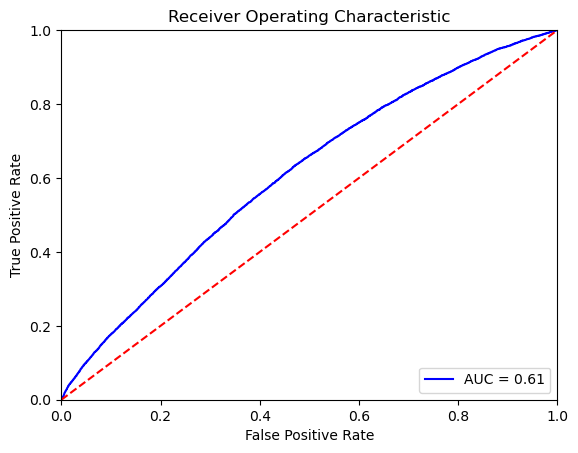

In [34]:
plot_roc_curve(fpr, tpr, roc_auc)

## Advanced Evaluation

In [35]:
results_df = pd.DataFrame()
results_df['true_class'] = y_test
results_df['predicted_class'] = list(preds)
results_df['default_prob'] = probs[:, 1]

### Class Prediction Percentages

In [36]:
results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True)

true_class  predicted_class
0           0                  0.999973
            1                  0.000027
1           0                  0.999705
            1                  0.000295
Name: predicted_class, dtype: float64

As we expected, nearly all of our test cases were classified as 0s (non defaulted loans)

### Class Probability Distributions

In [37]:
default_probs_f = results_df[results_df['true_class'] == 0]['default_prob']

In [38]:
default_probs_t = results_df[results_df['true_class'] == 1]['default_prob']

We can use seaborn [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to plot the distributions of our new variables on one chart

/var/folders/ss/v59ygfzj7m1dkgsklj3ck7m80000gn/T/ipykernel_1981/684404094.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(default_probs_f, label="No Default", hist=False)
/var/folders/ss/v59ygfzj7m1dkgsklj3ck7m80000gn/T/ipykernel_1981/684404094.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

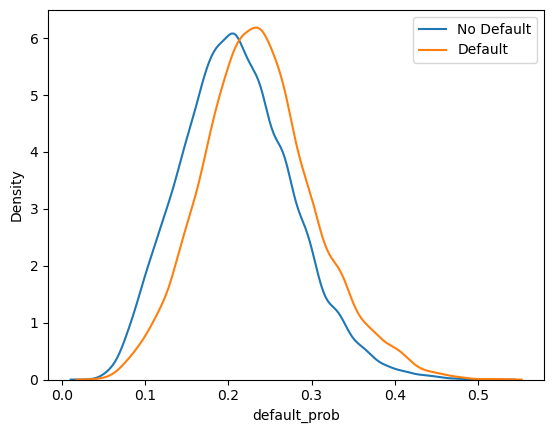

In [39]:
sns.distplot(default_probs_f, label="No Default", hist=False)
sns.distplot(default_probs_t, label="Default", hist=False)
plt.legend(loc = 'best')
plt.show()

This chart again shows us that the model has very poor separability

However, we can see that the probability of a defaulted loan being predicted as a default is generally higher than the same probability for a non-default so maybe there is something we can work with

In [40]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    ConfusionMatrixDisplay(model, x_test, y_test)
    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.distplot(results_df[results_df['true_class'] == 0]['default_prob'], label="No Default", hist=False)
    sns.distplot(results_df[results_df['true_class'] == 1]['default_prob'], label="Default", hist=False)
    plt.show()

    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))

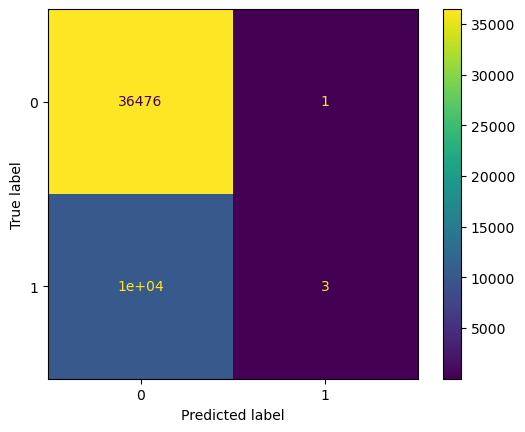

In [42]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    confusion = confusion_matrix(y_test, preds)
    
    # Create the ConfusionMatrixDisplay object
    cm_display = ConfusionMatrixDisplay(confusion)
    
    # Plot the confusion matrix
    cm_display.plot()
    plt.show()

# Assuming you have already defined logistic_model, x_test, and y_test
eval_model(logistic_model, x_test, y_test)